Detecting lines by calculating second-moment matrix


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

First of all, we assume that we have three kinds of lines which are the output of a canny filter, so let's make 3 input images for our algorithm.

The first image consists of a single straight line, the second image should be a curvy line and the other one is another curvy line with a different angle.

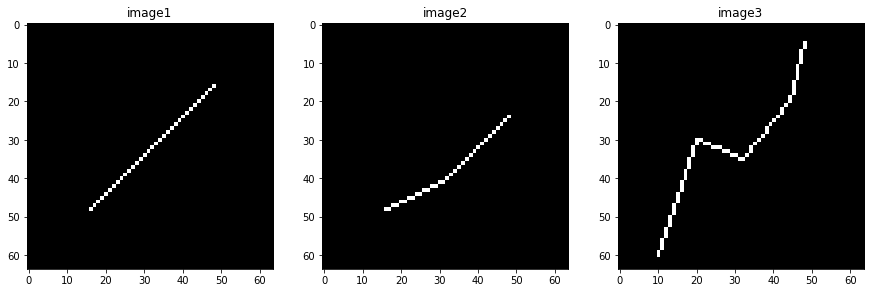

In [51]:
imgs = [np.zeros((64,64)) for i in range(3)]
imgs[0] = cv.line(img=imgs[0], pt1=(16,48), pt2=(48,16), color=(255,255,255), thickness=1)
pts = np.array([[16,48],[32,40],[40,32],[48,24]])
imgs[1] = cv.polylines(imgs[1], [pts],isClosed=False, color=(255,255,255), thickness=1)
pts = np.array([[10,60],[20,30],[32,35],[44,20],[48,5]])
imgs[2] = cv.polylines(imgs[2], [pts],isClosed=False, color=(255,255,255), thickness=1)

plt.figure(figsize=(15,15))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title(f'image{i+1}')
plt.show()

Defining second-moment matrix calculation as below:
sum_{i=1}^{n}(x_i-\mu_{x})(y_i-\mu_{y}) \\ \sum_{i=1}^{n}(x_i-\mu_{x})(y_i-\mu_{y}) & \sum_{i=1}^{n}(y_i-\mu_{y}) \end{bmatrix}$$

In [52]:
def list_of_points(img:np)->list:
    height, width = img.shape
    lop = []
    for i in range(height):
        for j in range(width):
            if(img[i,j] != 0):
                lop += [(i,j)]
    return lop

def second_moment_matrix(points:list)->np:
    mu_x = 0
    mu_y = 0
    for point in points:
        mu_x += point[1]
        mu_y += point[0]
    mu_x = mu_x/len(points)
    mu_y = mu_y/len(points)
    m = np.zeros((2,2))
    for point in points:
        m[0,0] += (point[1]-mu_x)
        m[0,1] += (point[1]-mu_x)*(point[0]-mu_y)
        m[1,0] += (point[1]-mu_x)*(point[0]-mu_y)
        m[1,1] += (point[0]-mu_y)
    return m

smms = []
for i in range(3):
    smm = second_moment_matrix(list_of_points(imgs[i]))
    print(f'second moment matrix for image number{i+1} is:\n {smm}')
    smms += [smm]


second moment matrix for image number1 is:
 [[    0. -2992.]
 [-2992.     0.]]
second moment matrix for image number2 is:
 [[ 0.00000000e+00 -2.27600000e+03]
 [-2.27600000e+03 -5.68434189e-14]]
second moment matrix for image number3 is:
 [[-1.00186526e-12 -1.25344521e+04]
 [-1.25344521e+04  8.24229573e-13]]


Now we want to compute the angle and straightness of the line in each edgelet having second-moment matrics.
According to the formula below, we have to compute second-moment matric eigen values and obtain $\lambda$ and $v$ values as below:
$$[\lambda, v] = eig(M)$$
$$\theta = atan2(v_{2,2}, v_{1,2})$$
$$conf = \frac{\lambda_{2}}{\lambda_1}$$


In [53]:
for i in range(3):
    l, v = np.linalg.eig(smms[i])
    angle = np.arctan2(v[1,1],v[0,1])
    conf = l[1]/l[0]
    print(f'line angle for image{i+1} is {np.degrees(angle)} degrees and the strighness is {np.abs(conf)}')

line angle for image1 is 45.0 degrees and the strighness is 1.0
line angle for image2 is 45.0 degrees and the strighness is 1.0
line angle for image3 is -45.000000000000014 degrees and the strighness is 0.9999999999999994
